In [177]:
import pandas as pd

In [178]:
df= pd.read_csv("Salary Data.csv")

In [179]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [180]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [181]:
#Calculate null counts and percentages for each column in the dataset
null_counts = df.isna().sum()
null_percentage = (df.isna().mean() * 100)
#Combine the counts and percentages into a single DataFrame for display
null_val = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
#Print the DataFrame,
print(null_val)

                     Null Count  Percentage
Age                           2    0.533333
Gender                        2    0.533333
Education Level               2    0.533333
Job Title                     2    0.533333
Years of Experience           2    0.533333
Salary                        2    0.533333


In [204]:
df[df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [182]:
df =df.dropna()

In [183]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [184]:
df.shape

(373, 6)

In [185]:
df.duplicated().sum()

49

In [186]:
df= df.drop_duplicates()

In [187]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [188]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [189]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [191]:
#Encoding gender
mapping= {"Male":0,"Female":1}
df["Gender"]=df["Gender"].map(mapping)

C:\Users\hayoo\AppData\Local\Temp\ipykernel_29120\209794228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"]=df["Gender"].map(mapping)


In [192]:
#Encoding gender
mapping= {"Bachelor's":0,"Master's":1,"PhD":2}
df["Education Level"]=df["Education Level"].map(mapping)

C:\Users\hayoo\AppData\Local\Temp\ipykernel_29120\4278211891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"]=df["Education Level"].map(mapping)


In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

C:\Users\hayoo\AppData\Local\Temp\ipykernel_29120\3422800687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = label_encoder.fit_transform(df['Job Title'])


C:\Users\hayoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


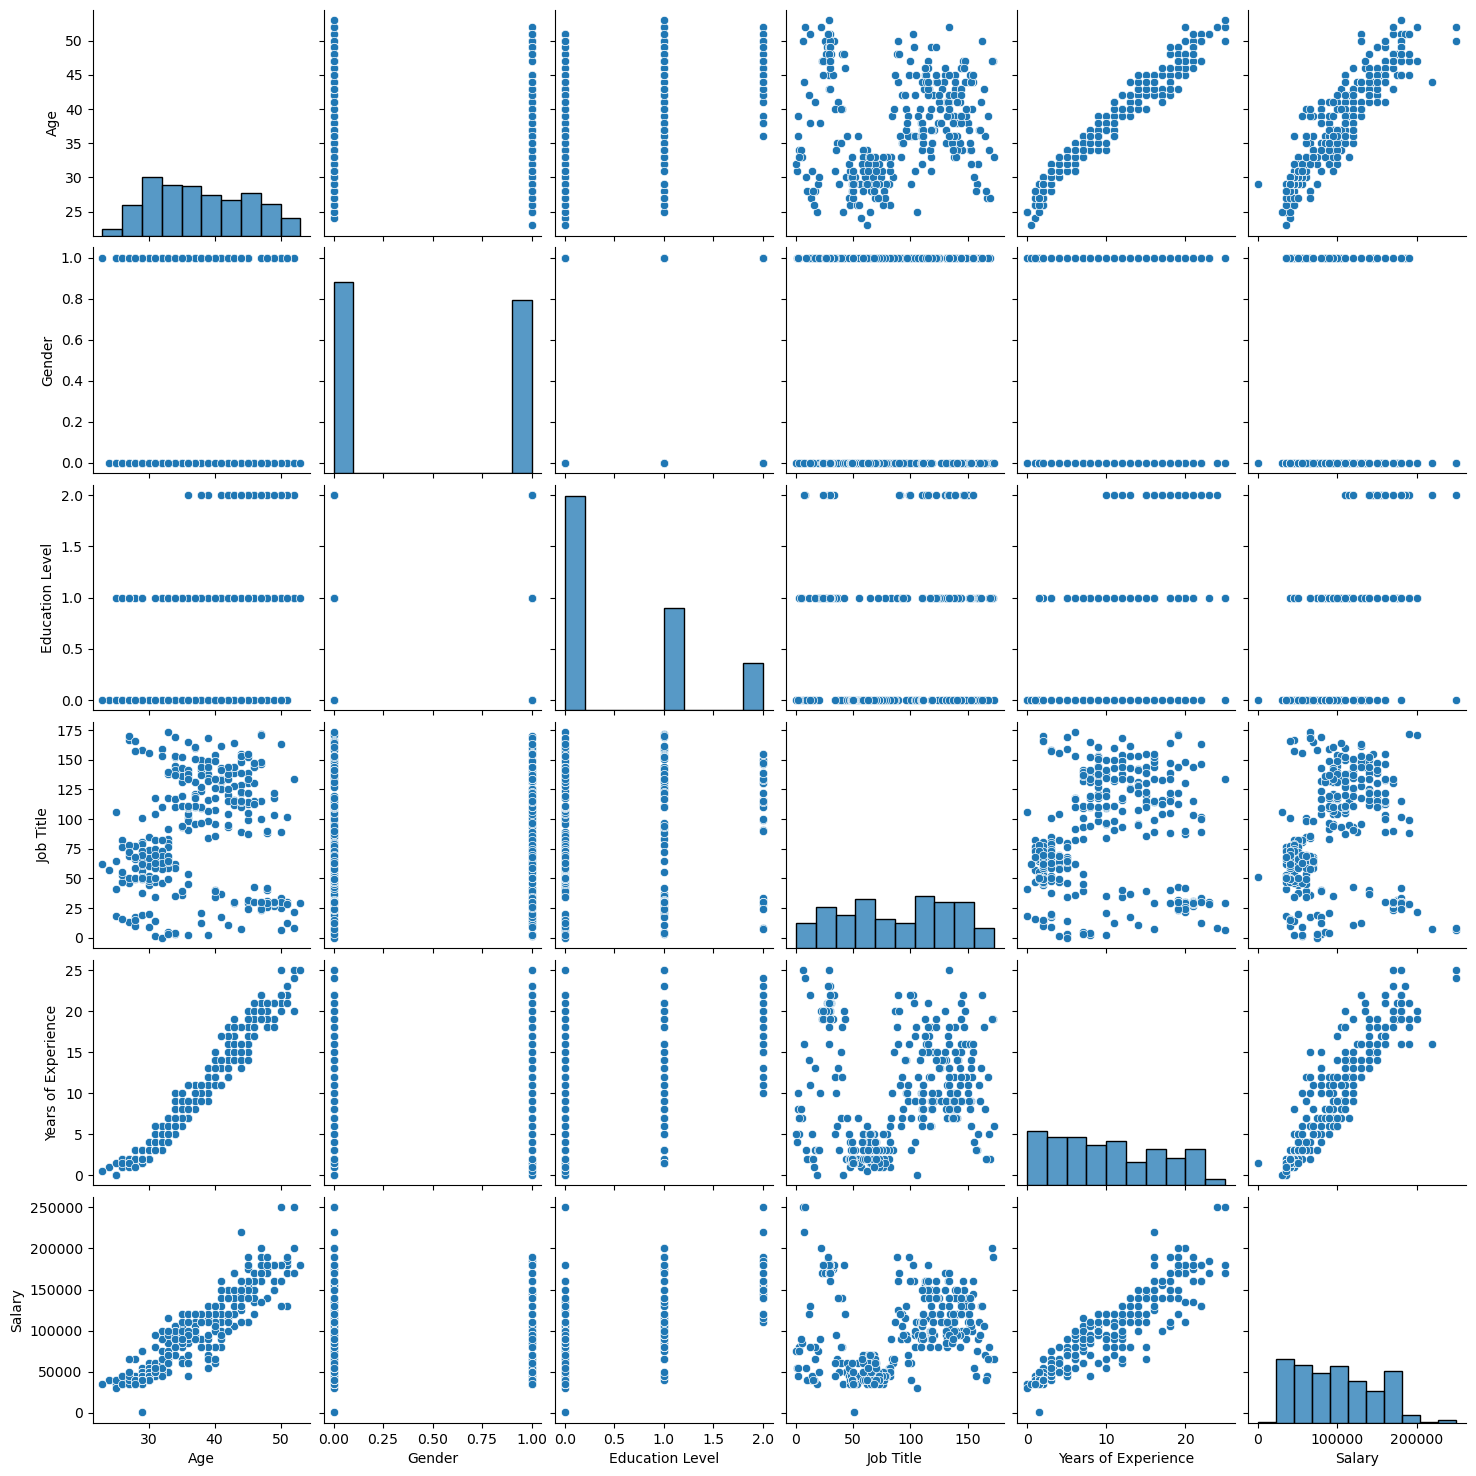

In [194]:
import seaborn as sns
sns.pairplot(df)

In [195]:
X= df.drop('Salary', axis=1)
y=df['Salary']

In [196]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures transformer with degree=2 (quadratic features) and include_bias=False
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Transform the input features X to generate polynomial features
X_poly = poly_features.fit_transform(X)
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 2812.90696248 -7389.07833506 15422.73585954    19.57695617
  2892.12850555]
Mean squared error: 205754135.72
Coefficient of determination: 0.89


In [197]:
X_test.shape

(65, 5)

In [198]:
y_test.shape

(65,)

In [200]:
X1 = df[['Years of Experience']]
y1= df['Salary']

In [201]:
# Split the data into training/testing sets
X_train1 = X1[:-20]
X_test1 = X1[-20:]

# Split the targets into training/testing sets
y_train1 = y1[:-20]
y_test1 = y1[-20:]

In [202]:

# Create linear regression model
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train1, y_train1)

# Make predictions using the testing set
y_pred1 = regr2.predict(X_test1)

# The coefficients
print("Coefficients: \n", regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test1, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test1, y_pred1))

Coefficients: 
 [6690.21118402]
Mean squared error: 221896251.23
Coefficient of determination: 0.91


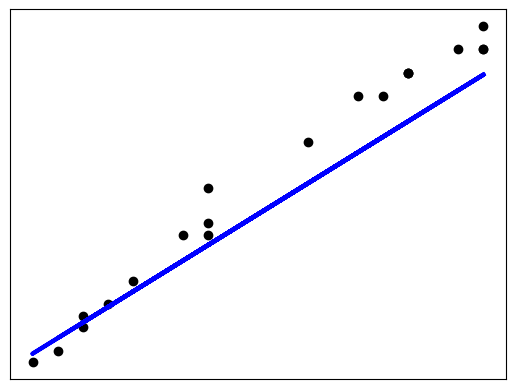

In [203]:
# Plot outputs
plt.scatter(X_test1, y_test1, color="black")
plt.plot(X_test1,y_pred1, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()